In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier


1. Abrimos, vemos, controlamos, limpiamos y completamos

In [4]:
df=pd.read_csv('marketing_campaign.csv' , sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [8]:
# Mostrar si hay valores faltantes en cada columna
valores_faltantes = df.isnull().sum()

# Ver columnas con valores faltantes
print(valores_faltantes[valores_faltantes > 0])


Income    24
dtype: int64


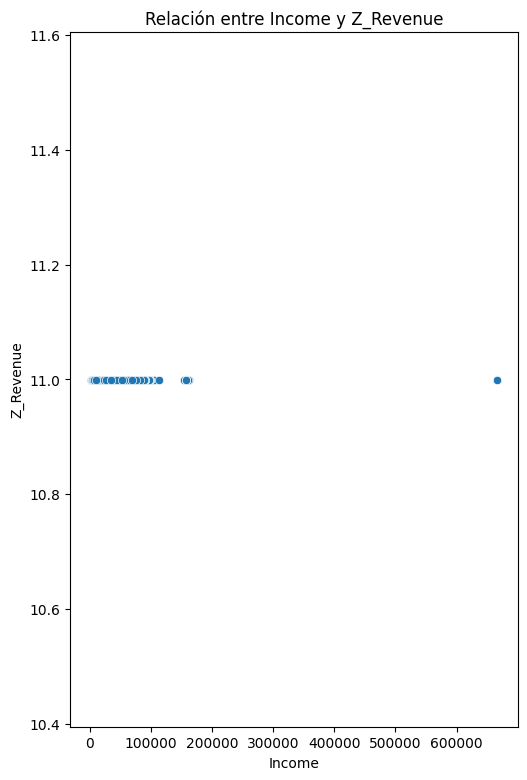

In [13]:
#La unica columna con valor faltante es la de Income que es el ingreso anual
selected_columns = ['Income','Z_Revenue']  # Ejemplo de columnas relevantes
plt.figure(figsize=(10, 15))
for i, col in enumerate(selected_columns[1:]):  # Excluir Income como dependiente
    plt.subplot(2, 2, i + 1)
    sns.scatterplot(x='Income', y=col, data=df)
    plt.title(f'Relación entre Income y {col}')
    plt.xlabel('Income')
    plt.ylabel(col)
plt.tight_layout()
plt.show()


Podemos ver que no tienen relacion con z_revenue, podemos pensar que las personas con mayor educacion tienden a ganar mas 

In [14]:
# Imputamos por la mediana de la columna Income según el nivel educativo
df['Income'] = df.groupby('Education')['Income'].transform(lambda x: x.fillna(x.median()))

In [15]:
# Mostrar si hay valores faltantes en cada columna
valores_faltantes = df.isnull().sum()

# Ver columnas con valores faltantes
print(valores_faltantes[valores_faltantes > 0])

Series([], dtype: int64)


In [17]:
# Identificar filas duplicadas
duplicados = df.duplicated()


# Contar el número total de filas duplicadas
print(f"Total de filas duplicadas: {duplicados.sum()}")


Total de filas duplicadas: 0


In [19]:
# El siguiente paso es codificar las variables categoricas con label enconder
categorical_columns = df.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [20]:
# Estandarizamos los datos con standarscaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.select_dtypes(include=[np.number]))

El método del codo es una técnica para determinar el número óptimo de clusters en un modelo de agrupamiento (como K-means). Evalúa cómo la inercia (suma de las distancias cuadradas de los puntos a sus centroides) disminuye a medida que aumentamos el número de clusters. El "codo" en el gráfico indica el punto en el que agregar más clusters no mejora significativamente el modelo.

El número óptimo de clusters según el método del codo es: 4


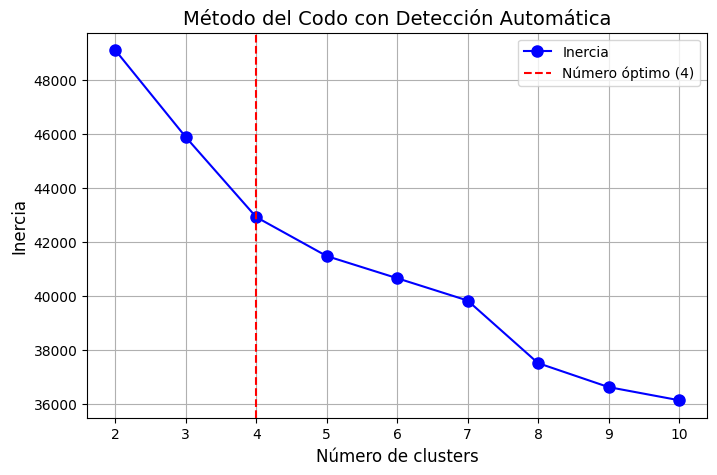

In [25]:
from kneed import KneeLocator

# Definir los posibles valores de k (número de clusters)
k_values = range(2, 11)

# Calcular la inercia para cada número de clusters
inertia = [KMeans(n_clusters=k, random_state=42).fit(scaled_features).inertia_ for k in k_values]

# Detectar el punto del codo automáticamente
knee = KneeLocator(k_values, inertia, curve="convex", direction="decreasing")

# Mostrar el número óptimo de clusters según el método del codo
print(f"El número óptimo de clusters según el método del codo es: {knee.knee}")

# Visualización
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, 'bo-', markersize=8, label='Inercia')
plt.axvline(x=knee.knee, linestyle='--', color='red', label=f'Número óptimo ({knee.knee})')
plt.xlabel('Número de clusters', fontsize=12)
plt.ylabel('Inercia', fontsize=12)
plt.title('Método del Codo con Detección Automática', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()



Usaremos K-means con el número óptimo de clusters que obtuvimos con el metodo del codo

In [26]:
# Definir el número de clusters
optimal_k = 4

# Crear y ajustar el modelo KMeans
kmeans_model = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_model.fit(scaled_features)

# Predecir los clusters y asignar las etiquetas
df['Cluster'] = kmeans_model.predict(scaled_features)

In [31]:
# División del dataset para modelado
target = 'Response'
X = df.drop(columns=[target])
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [32]:
# Asignar pesos de clase
class_weights = {0: 1, 1: 10}

La columna response se refiere a Indicador de si el cliente respondió a la última campaña de marketing (1 = sí, 0 = no). Entonces elegimos como target 


Empezamos con el MLP

In [33]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
mlp = MLPClassifier(hidden_layer_sizes=(100, 64), max_iter=500, random_state=42)
mlp.fit(X_train_res, y_train_res)

MLPClassifier(hidden_layer_sizes=(100, 64), max_iter=500, random_state=42)

In [34]:
y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)

print("Evaluación en el conjunto de entrenamiento:")
print(classification_report(y_train, y_train_pred))
print("Evaluación en el conjunto de prueba:")
print(classification_report(y_test, y_test_pred))

Evaluación en el conjunto de entrenamiento:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1525
           1       0.65      0.06      0.12       267

    accuracy                           0.86      1792
   macro avg       0.76      0.53      0.52      1792
weighted avg       0.83      0.86      0.80      1792

Evaluación en el conjunto de prueba:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       381
           1       0.71      0.07      0.14        67

    accuracy                           0.86       448
   macro avg       0.79      0.53      0.53       448
weighted avg       0.84      0.86      0.80       448



Precisión (Precision):
En ambos conjuntos (entrenamiento y prueba), la precisión para la clase 0 es bastante alta (0.86), mientras que para la clase 1 es considerablemente más baja (0.65 en el entrenamiento y 0.71 en la prueba).
Esto indica que el modelo es bueno para predecir la clase 0 (positivos verdaderos), pero tiene dificultades para identificar correctamente la clase 1.
Recuperación (Recall):
El recall para la clase 0 es excelente (0.99 en ambos conjuntos), lo que significa que el modelo casi siempre identifica correctamente las instancias de la clase 0.
F1-Score:
El F1-score para la clase 0 es bastante bueno (0.92 en ambos conjuntos), lo que refleja un buen balance entre precisión y recall.
El modelo está claramente sesgado hacia la clase 0, como lo muestra el muy bajo recall y F1-score para la clase 1.
Macro avg:
El macro average de la precisión (0.76) y el recall (0.53) muestra que, en general, el modelo tiene un rendimiento moderado en ambas clases. Sin embargo, el bajo recall en la clase 1 reduce significativamente el rendimiento general.
El weighted average de la precisión (0.83) y el recall (0.86) es más alto, lo que indica que el modelo tiene un rendimiento relativamente bueno cuando se toma en cuenta la distribución de clases en el conjunto de datos, pero aún hay una desventaja significativa en la clase 1.
Dado el alto recall para la clase 0, el modelo está prediciendo correctamente muchas instancias de la clase dominante (0). Sin embargo, la clase 1, al ser menos frecuente, está mal representada, lo que afecta la capacidad general del modelo para aprender y predecir esta clase.